<span style="font-size:36px"><b>Model Inference</b></span>

Copyright &copy; 2020 Gunawan Lumban Gaol

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language overning permissions and limitations under the License.

# Import Packages

In [61]:
import os
import sys
import glob

import numpy as np
import IPython.display as ipd
import librosa
import librosa.display as ld
import matplotlib.pyplot as plt
from pydub.utils import mediainfo
from ipywidgets import interact
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import load_model

from gurih.data.splitter import Splitter
from gurih.data.normalizer import AudioNormalizer
from gurih.features.extractor import MFCCFeatureExtractor

# Load Saved Model

In [3]:
# model_filepath = '../../models/BaselineASR_f200_k11_s2_pvalid_nlstm200_ndense29.h5'
# model = load_model(model_filepath)

# Create Audio Transcript

In [4]:
# Single file
# mp3_file = "blabla.mp3"
# X = [mp3_file]

In [5]:
# Multiple files from a directory
input_dir = "../../dataset/sample/"
mp3_files = glob.glob(input_dir+"*.mp3")
X = list(mp3_files)

If audio duration is more than `max_seq_length` of the model, then the audio will be splitted before transcription.

In [8]:
SAMPLE_RATE = 16000

In [10]:
def mono_process(x):
    # Normalize audio
    normalizer = AudioNormalizer(sample_rate=SAMPLE_RATE,
                                 mono=True,
                                 write_audio_output=False, # don't output normalized audio
                                 output_dir=".",
                                 encode=False) # don't output .json
    x_norm = normalizer.fit_transform(x)
    print(x_norm)
    
    # Split audio
#     splitter = Splitter(max_frame_length=80000,
#                         strides=80000,
#                         padding='same')
#     x_splitted = splitter.fit_transform(x)

    # Extract MFCC Features
    mfcc_extractor = MFCCFeatureExtractor(sample_rate=SAMPLE_RATE,
                                          frame_size=0.025,
                                          frame_stride=0.01,
                                          filter_num=26,
                                          cep_num=13,
                                          NFFT=512,
                                          low_freq=0,
                                          high_freq=None,
                                          pre_emphasis_coeff=0.97,
                                          cep_lifter=22,
                                          dct_type=2,
                                          dct_norm="ortho",
                                          append_energy=True,
                                          append_delta=True,
                                          low_memory=False,
                                          write_output=False,
                                          output_dir=".")

    x_freq = mfcc_extractor.fit_transform(x_norm)
    print(x_freq)

    # Create figure for visualization
    plt.figure(figsize=(15, 6))
    plt.subplot(2, 1, 1)
    _ = ld.waveplot(np.asfortranarray(x_norm[x[:-4]]), sr=SAMPLE_RATE)
    plt.title("Normalized Audio")
    plt.subplot(2, 1, 2)
    _ = ld.specshow(x_freq[x[:-4]], sr=SAMPLE_RATE)
    plt.title("MFCC Features Audio")
    plt.show()
    
    return [x, x_norm, x_freq]

D:\Anaconda2019\envs\gurih\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


{'../../dataset/sample/202102_1': array([ 0.        ,  0.        ,  0.        , ..., -0.01412258,
       -0.08815697,  0.        ], dtype=float32)}
{'../../dataset/sample/202102_1': array([[ -2.79690931, -14.19891613,  -7.16161911, ...,  -0.26280787,
          0.81574658,   0.64531659],
       [ -0.79439432,  -3.08435553, -10.94941094, ...,   0.35273131,
          2.37041916,   1.18651299],
       [ -0.29636958,  -3.68177802, -15.3896097 , ...,   1.54086766,
          3.23770472,   0.97511831],
       ...,
       [ -0.94846153,  -9.91236997, -18.68658963, ...,   1.59404727,
         -0.45862431,  -0.01981487],
       [ -0.86579204, -13.58654847, -17.73354068, ...,   0.59874749,
         -0.62677278,  -0.18354513],
       [ -1.00196571, -14.43333513, -16.75610564, ...,  -0.02401861,
         -0.33595208,  -0.15311806]])}


TypeError: unhashable type: 'list'

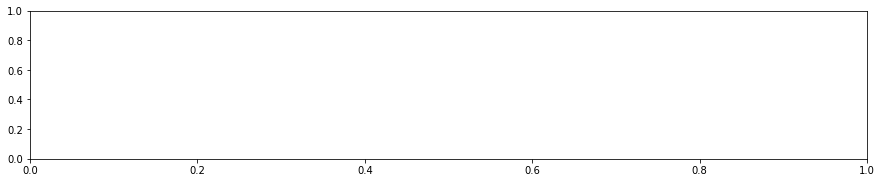

In [11]:
x, x_norm, x_freq = mono_process(["../../dataset/sample/202102_1.mp3"])

In [12]:
SAMPLE_RATE = 16000 # in Hz
MAX_DURATION = 5.0 # in seconds

@interact
def infer(x=X):
    print(x)
    
    is_mono = mediainfo(x)['channels'] == '1'
    if is_mono:
        print("Starting mono process...")
        mono_process(x)
    else:
        raise Exception('Please provide audio with mono channel.')
    
    return ipd.Audio(x)

interactive(children=(Dropdown(description='x', options=('../../dataset/sample\\2019-09-03_Annisa Rahmawaty_39…

In [5]:
data, sr = librosa.load("../../dataset/sample/239382.mp3", mono=False, sr=16000)

In [10]:
@interact
def plot_sample(x=X):
    data, sr = librosa.load(x, mono=False, sr=22050)
    plt.figure(figsize=(12, 7))
    plt.subplot(3, 1, 1)
    _ = librosa.display.waveplot(data, sr=sr)
    plt.title(x)
    plt.subplot(3, 1, 2)
    _ = librosa.display.waveplot(np.asfortranarray(data[0]), sr=sr)
    plt.title("Operator Side")
    plt.subplot(3, 1, 3)
    _ = librosa.display.waveplot(np.asfortranarray(data[1]), sr=sr)
    plt.title("Client Side")
    plt.tight_layout()
    plt.show()
    return ipd.Audio(x)

interactive(children=(Dropdown(description='x', options=('../../dataset/sample\\2019-09-03_Annisa Rahmawaty_39…